In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch
from sklearn.preprocessing import MinMaxScaler
from scipy.fft import fft, fftfreq
scaler = MinMaxScaler()

In [ ]:

txt_file = ['dc_L_comp2-tb.txt', 'dc-tb.txt']
color = ['tab:blue', 'tab:red']

for idx, i in enumerate(txt_file):
    df_raw = pd.read_csv(txt_file[idx], sep=r'\s+')
    par_names = df_raw.columns.to_list()
    vout = df_raw['voutval']
    n = range(1,len(df_raw)+1)
    fig, ax1 = plt.subplots()
    ax1.grid(axis='x')
    ax1.set_xlabel('n')
    color = 'tab:blue'
    ax1.set_ylabel(r'$V_\mathrm{OUT}$ (V)', color=color)
    ax1.plot(n, vout, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title(txt_file[idx])
#df = df_raw.drop(['v-sweep'], axis=1)
#fig.savefig("dc_best1", bbox_inches='tight', dpi=300)

In [14]:
txt_file = 'top_large/spectral_tb.txt'
df = pd.read_csv(txt_file,sep=r'\s+')

In [15]:
idrop = range(0,18)
df = df.drop(idrop)

In [ ]:
par_names = df.columns.to_list()
print(f'Parameter Names: {par_names}')
print(len(df))

In [16]:
time = df['time'].values #in nanosec
transmittance = df['t'].values
tnom = (transmittance-np.min(transmittance))/np.ptp(transmittance)
vload = df['load'].values


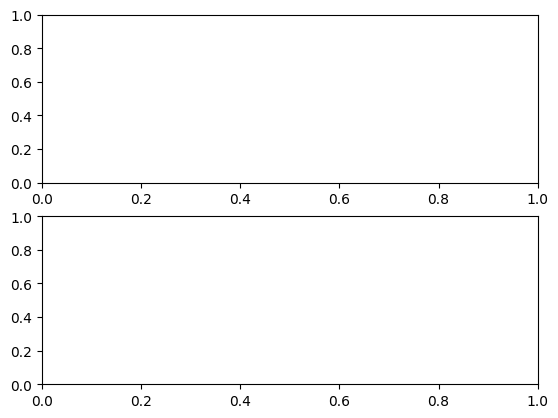

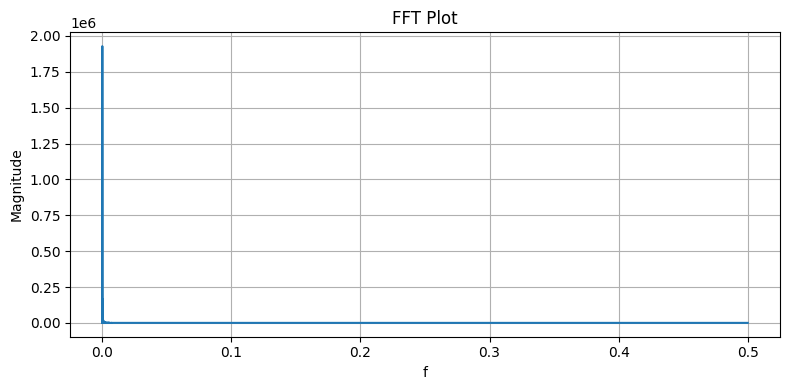

In [20]:
#Tsamp = time[1] - time[0]
fs = 1 #sampling frequency 30 kHz
Tsamp = 1/fs
N = len(tnom)
fstep = fs/N

#FFT variables
yf = fft(tnom)
yf = np.abs(yf[:N//2])
yf = np.delete(yf, 0)
xf = fftfreq(N, Tsamp)[:N//2]
xf = np.delete(xf, 0)


fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)
plt.figure(figsize=(8, 4))
#ax1.plot(time, tnom)
#ax2.plot(time,vload)

plt.plot(xf, yf)
plt.title('FFT Plot')
plt.xlabel('f')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()